# The credit fraud dataset - Synthesizing the minority class
In this notebook it's presented a practical exercise of how to use the avilable library GANs to synthesize tabular data.
For the purpose of this exercise it has been used the Credit Fraud dataset from Kaggle, that you can find here:https: //www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
# Note: You can select between running the Notebook on "CPU" or "GPU"
# Click "Runtime > Change Runtime time" and set "GPU"

In [ ]:
#Install synthetic lib
#! pip install pip install git+https://github.com/ydataai/synthetic.git

In [1]:
import importlib
import sys  

import pandas as pd
import numpy as np
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

from pysynthetic.synthesizers.regular import VanilllaGAN
from pysynthetic.preprocessing.regular.credit_fraud import *

model = VanilllaGAN

In [3]:
#Read the original data and have it preprocessed
data = pd.read_csv('csv/creditcard.csv', index_col=[0])

In [4]:
data_cols = list(data.columns[ data.columns != 'Class' ])
label_cols = ['Class']

print('Dataset columns: {}'.format(data_cols))
sorted_cols = ['V14', 'V4', 'V10', 'V17', 'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23', 'Class']
processed_data = data[ sorted_cols ].copy()

Dataset columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [5]:
#Before training the GAN do not forget to apply the required data transformations
#To ease here we've applied a PowerTransformation
data = transformations(data)

#For the purpose of this example we will only synthesize the minority class
train_data = data.loc[ data['Class']==1 ].copy()

print("Dataset info: Number of records - {} Number of varibles - {}".format(train_data.shape[0], train_data.shape[1]))

algorithm = cluster.KMeans
args, kwds = (), {'n_clusters':2, 'random_state':0}
labels = algorithm(*args, **kwds).fit_predict(train_data[ data_cols ])

print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )

fraud_w_classes = train_data.copy()
fraud_w_classes['Class'] = labels

Dataset info: Number of records - 492 Number of varibles - 30
   count
0    384
1    108


# GAN training

Below you can try to train your own generators using the available GANs architectures. You can train it either with labels (created using KMeans) or with no labels at all. 

Remeber that for this exercise in particular we've decided to synthesize only the minority class from the Credit Fraud dataset.

In [27]:
#Define the GAN and training parameters
noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
epochs = 500+1
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

train_sample = fraud_w_classes.copy().reset_index(drop=True)
train_sample = pd.get_dummies(train_sample, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train_sample.columns if 'Class' in i ]
data_cols = [ i for i in train_sample.columns if i not in label_cols ]
train_sample[ data_cols ] = train_sample[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train_sample[ data_cols ]

gan_args = [batch_size, learning_rate, beta_1, beta_2, noise_dim, train_sample.shape[1], dim]
train_args = ['', epochs, log_step]

In [28]:
#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(train_sample, train_args)

0 [D loss: 0.726817, acc.: 10.16%] [G loss: 0.705102]
generated_data
1 [D loss: 0.683275, acc.: 54.30%] [G loss: 0.699818]
2 [D loss: 0.668427, acc.: 50.39%] [G loss: 0.683618]
3 [D loss: 0.674072, acc.: 49.22%] [G loss: 0.645203]
4 [D loss: 0.693384, acc.: 49.22%] [G loss: 0.605972]
5 [D loss: 0.703121, acc.: 49.61%] [G loss: 0.604985]
6 [D loss: 0.704389, acc.: 49.61%] [G loss: 0.623939]
7 [D loss: 0.692705, acc.: 48.83%] [G loss: 0.684093]
8 [D loss: 0.695608, acc.: 49.22%] [G loss: 0.706650]
9 [D loss: 0.730426, acc.: 48.83%] [G loss: 0.712720]
10 [D loss: 0.751313, acc.: 39.45%] [G loss: 0.698906]
11 [D loss: 0.750707, acc.: 26.17%] [G loss: 0.733035]
12 [D loss: 0.726176, acc.: 25.39%] [G loss: 0.799812]
13 [D loss: 0.687364, acc.: 58.59%] [G loss: 0.885806]
14 [D loss: 0.652589, acc.: 66.41%] [G loss: 0.954590]
15 [D loss: 0.632593, acc.: 68.36%] [G loss: 0.981760]
16 [D loss: 0.622411, acc.: 68.36%] [G loss: 0.995649]
17 [D loss: 0.621459, acc.: 71.88%] [G loss: 0.983740]
18 [D

151 [D loss: 0.644039, acc.: 60.94%] [G loss: 1.062517]
152 [D loss: 0.601351, acc.: 66.02%] [G loss: 1.111742]
153 [D loss: 0.591457, acc.: 65.23%] [G loss: 1.190645]
154 [D loss: 0.562401, acc.: 67.19%] [G loss: 1.211925]
155 [D loss: 0.550341, acc.: 71.88%] [G loss: 1.248272]
156 [D loss: 0.543314, acc.: 71.88%] [G loss: 1.205858]
157 [D loss: 0.573261, acc.: 71.88%] [G loss: 1.189227]
158 [D loss: 0.576808, acc.: 68.75%] [G loss: 1.268107]
159 [D loss: 0.554533, acc.: 70.31%] [G loss: 1.290946]
160 [D loss: 0.591111, acc.: 68.75%] [G loss: 1.323819]
161 [D loss: 0.548842, acc.: 71.48%] [G loss: 1.269935]
162 [D loss: 0.572346, acc.: 69.14%] [G loss: 1.294848]
163 [D loss: 0.552279, acc.: 70.31%] [G loss: 1.183016]
164 [D loss: 0.579030, acc.: 70.31%] [G loss: 1.120723]
165 [D loss: 0.591508, acc.: 71.09%] [G loss: 1.058350]
166 [D loss: 0.602295, acc.: 67.97%] [G loss: 1.096229]
167 [D loss: 0.607382, acc.: 67.97%] [G loss: 1.097329]
168 [D loss: 0.606255, acc.: 67.19%] [G loss: 1.

304 [D loss: 0.611299, acc.: 66.41%] [G loss: 1.096009]
305 [D loss: 0.591871, acc.: 69.53%] [G loss: 1.101069]
306 [D loss: 0.595145, acc.: 65.62%] [G loss: 1.185135]
307 [D loss: 0.557986, acc.: 73.05%] [G loss: 1.220170]
308 [D loss: 0.565578, acc.: 73.83%] [G loss: 1.186376]
309 [D loss: 0.554355, acc.: 79.30%] [G loss: 1.156245]
310 [D loss: 0.561337, acc.: 75.78%] [G loss: 1.122871]
311 [D loss: 0.596306, acc.: 69.14%] [G loss: 1.073555]
312 [D loss: 0.601907, acc.: 66.80%] [G loss: 1.000579]
313 [D loss: 0.635385, acc.: 63.67%] [G loss: 0.972270]
314 [D loss: 0.642081, acc.: 61.72%] [G loss: 0.972390]
315 [D loss: 0.655596, acc.: 61.33%] [G loss: 0.934101]
316 [D loss: 0.633920, acc.: 65.62%] [G loss: 0.966337]
317 [D loss: 0.618044, acc.: 65.62%] [G loss: 1.004567]
318 [D loss: 0.608266, acc.: 71.09%] [G loss: 1.093488]
319 [D loss: 0.577335, acc.: 69.53%] [G loss: 1.164655]
320 [D loss: 0.589657, acc.: 69.92%] [G loss: 1.147428]
321 [D loss: 0.594610, acc.: 67.58%] [G loss: 1.

460 [D loss: 0.633859, acc.: 63.67%] [G loss: 0.889146]
461 [D loss: 0.622761, acc.: 68.36%] [G loss: 0.931292]
462 [D loss: 0.633255, acc.: 63.28%] [G loss: 0.906392]
463 [D loss: 0.632182, acc.: 63.67%] [G loss: 0.945602]
464 [D loss: 0.640481, acc.: 62.11%] [G loss: 0.950766]
465 [D loss: 0.650069, acc.: 59.77%] [G loss: 0.926369]
466 [D loss: 0.656808, acc.: 59.38%] [G loss: 0.934925]
467 [D loss: 0.639625, acc.: 65.62%] [G loss: 0.948599]
468 [D loss: 0.659978, acc.: 61.33%] [G loss: 0.965447]
469 [D loss: 0.643072, acc.: 59.38%] [G loss: 1.008589]
470 [D loss: 0.630086, acc.: 64.06%] [G loss: 1.007510]
471 [D loss: 0.619163, acc.: 66.02%] [G loss: 1.004037]
472 [D loss: 0.613333, acc.: 64.06%] [G loss: 0.969811]
473 [D loss: 0.604149, acc.: 67.19%] [G loss: 0.973514]
474 [D loss: 0.625246, acc.: 64.45%] [G loss: 0.968338]
475 [D loss: 0.616189, acc.: 65.62%] [G loss: 0.950361]
476 [D loss: 0.647034, acc.: 61.72%] [G loss: 0.922821]
477 [D loss: 0.640872, acc.: 63.67%] [G loss: 0.

In [8]:
#Generator discription
synthesizer.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(128, 32)]               0         
_________________________________________________________________
dense (Dense)                (128, 128)                4224      
_________________________________________________________________
dense_1 (Dense)              (128, 256)                33024     
_________________________________________________________________
dense_2 (Dense)              (128, 512)                131584    
_________________________________________________________________
dense_3 (Dense)              (128, 30)                 15390     
Total params: 184,222
Trainable params: 184,222
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Discriminator description
synthesizer.discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(128, 30)]               0         
_________________________________________________________________
dense_4 (Dense)              (128, 512)                15872     
_________________________________________________________________
dropout (Dropout)            (128, 512)                0         
_________________________________________________________________
dense_5 (Dense)              (128, 256)                131328    
_________________________________________________________________
dropout_1 (Dropout)          (128, 256)                0         
_________________________________________________________________
dense_6 (Dense)              (128, 128)                32896     
_________________________________________________________________
dense_7 (Dense)              (128, 1)                  129 

In [14]:
!dir .

 Volume in drive C is OS
 Volume Serial Number is 881F-E289

 Directory of C:\Users\mithu\Desktop\synthetic_data

04/24/2021  06:56 PM    <DIR>          .
04/24/2021  06:56 PM    <DIR>          ..
04/24/2021  04:32 PM    <DIR>          .git
04/24/2021  06:24 PM    <DIR>          .ipynb_checkpoints
04/24/2021  06:56 PM    <DIR>          cache
04/24/2021  05:57 PM           103,016 Comparison_of_GAN_outputs.png
04/24/2021  06:56 PM           109,466 credit_fraud_pysynthetic.ipynb
04/24/2021  06:55 PM    <DIR>          csv
04/24/2021  05:56 PM           406,365 Encoder Decoder on Synthea Dataset.ipynb
04/24/2021  05:57 PM            62,738 Generated_sample.csv
04/24/2021  05:37 PM    <DIR>          model
04/24/2021  04:32 PM                61 README.md
04/29/2020  03:34 AM         8,982,431 synthea_sample_data_csv_apr2020.zip
04/24/2021  06:19 PM           702,192 synthesizer_stock.pkl
04/24/2021  06:21 PM           500,136 TimeGAN_Synthetic_stock_data.ipynb
               8 File(s)     1

In [16]:
# !mkdir -p /creditcard/saved/gan

The syntax of the command is incorrect.


In [24]:
#You can easily save the trained generator and loaded it aftwerwards
synthesizer.save('generator_fraud')

TypeError: save() takes 2 positional arguments but 3 were given

In [22]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

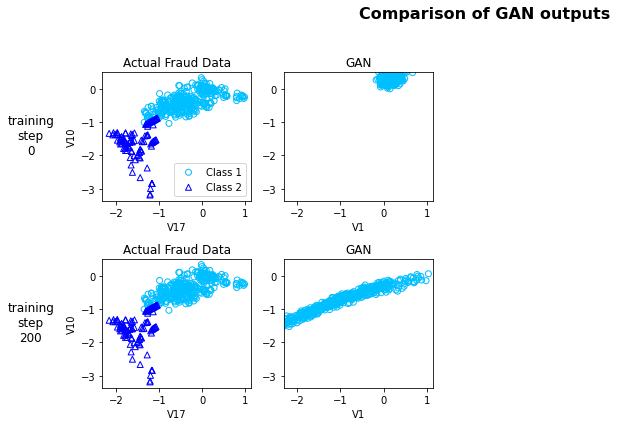

In [26]:
# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=train_sample, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols+label_cols)
labels = fraud_w_classes['Class']

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
class_labels = ['Class 1','Class 2']

col1, col2 = 'V17', 'V10'

base_dir = 'cache/'

#Actual fraud data visualization
model_steps = [ 0, 200, 300]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    for group, color, marker, label in zip(real_samples.groupby('Class_1'), colors, markers, class_labels ):
        plt.scatter( group[1][[col1]], group[1][[col2]], 
                         label=label, marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Fraud Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')
    
    for i, model_name in enumerate( model_names[:] ):

        [model_name, with_class, generator_model] = models[model_name]

        generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

        if with_class:
            g_z = generator_model.predict([z, labels])
            gen_samples = pd.DataFrame(g_z, columns=data_cols+label_cols)
            for group, color, marker, label in zip( gen_samples.groupby('Class_1'), colors, markers, class_labels ):
                plt.scatter( group[1][[col1]], group[1][[col2]], 
                                 label=label, marker=marker, edgecolors=color, facecolors='none' )
        else:
            g_z = generator_model.predict(z)
            gen_samples = pd.DataFrame(g_z, columns=data_cols+['label'])
            gen_samples.to_csv('Generated_sample.csv')
            plt.scatter( gen_samples[[col1]], gen_samples[[col2]], 
                             label=class_labels[0], marker=markers[0], edgecolors=colors[0], facecolors='none' )
        plt.title(model_name)   
        plt.xlabel(data_cols[0])
        ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')
